In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tree_constructor

In [2]:
# Mock up dataframe used to visualize trees and then create a function to visualize those trees 
df = pd.DataFrame({
    'Clade 4':['Asterids','Rosids','Rosids','Rosids','Asterids','Rosids'],
    'Order':['Lamiales','Rosales','Malpighiales','Rosales','Solanales','Cucurbitales'],
    'Family':['Lamiaceae','Cannabaceae','Euphorbiaceae','Moraceae','Solanaceae','Begoniaceae'],
    'Subfamily':[None,None,'Crotonoideae',None,None,None],
    'Genus':['Ocimum','Cannabis','Croton','Ficus','Solanum','Begonia'],
    'Species':[None,None,None,'F. elastica','S. tuberosum',None],
    'Common Name':['Basil','Cannabis','Croton','Rubber Plant','Potatoes','Begonia']
})
df['Kingdom'] = 'Plantae'
df['Clade 1'] = 'Tracheophytes'
df['Clade 2'] = 'Angiosperms'
df['Clade 3'] = 'Eudicots'

ordering_list = ['Kingdom','Clade 1','Clade 2','Clade 3','Clade 4','Order','Family','Subfamily','Genus','Species','Common Name']

coloring = {
    'Kingdom':'#ffffcc',
    'Clade 1':'#ffffcc',
    'Clade 2':'#ffffcc',
    'Clade 3':'#d9f0a3',
    'Clade 4':'#addd8e',
    'Order':'#78c679',
    'Family':'#41ab5d',
    'Subfamily':'#238443',
    'Genus':'#005a32',
    'Species':'#005030',
    'Common Name':'#000000'
}


In [3]:
df.columns

Index(['Clade 4', 'Order', 'Family', 'Subfamily', 'Genus', 'Species',
       'Common Name', 'Kingdom', 'Clade 1', 'Clade 2', 'Clade 3'],
      dtype='object')

In [4]:
df

,Clade 4,Order,Family,Subfamily,Genus,Species,Common Name,Kingdom,Clade 1,Clade 2,Clade 3
0,Asterids,Lamiales,Lamiaceae,None,Ocimum,None,Basil,Plantae,Tracheophytes,Angiosperms,Eudicots
1,Rosids,Rosales,Cannabaceae,None,Cannabis,None,Cannabis,Plantae,Tracheophytes,Angiosperms,Eudicots
2,Rosids,Malpighiales,Euphorbiaceae,Crotonoideae,Croton,None,Croton,Plantae,Tracheophytes,Angiosperms,Eudicots
3,Rosids,Rosales,Moraceae,None,Ficus,F. elastica,Rubber Plant,Plantae,Tracheophytes,Angiosperms,Eudicots
4,Asterids,Solanales,Solanaceae,None,Solanum,S. tuberosum,Potatoes,Plantae,Tracheophytes,Angiosperms,Eudicots
5,Rosids,Cucurbitales,Begoniaceae,None,Begonia,None,Begonia,Plantae,Tracheophytes,Angiosperms,Eudicots


In [5]:
df = df[ordering_list]

In [6]:
df

,Kingdom,Clade 1,Clade 2,Clade 3,Clade 4,Order,Family,Subfamily,Genus,Species,Common Name
0,Plantae,Tracheophytes,Angiosperms,Eudicots,Asterids,Lamiales,Lamiaceae,None,Ocimum,None,Basil
1,Plantae,Tracheophytes,Angiosperms,Eudicots,Rosids,Rosales,Cannabaceae,None,Cannabis,None,Cannabis
2,Plantae,Tracheophytes,Angiosperms,Eudicots,Rosids,Malpighiales,Euphorbiaceae,Crotonoideae,Croton,None,Croton
3,Plantae,Tracheophytes,Angiosperms,Eudicots,Rosids,Rosales,Moraceae,None,Ficus,F. elastica,Rubber Plant
4,Plantae,Tracheophytes,Angiosperms,Eudicots,Asterids,Solanales,Solanaceae,None,Solanum,S. tuberosum,Potatoes
5,Plantae,Tracheophytes,Angiosperms,Eudicots,Rosids,Cucurbitales,Begoniaceae,None,Begonia,None,Begonia


In [7]:
common_level, common_ancestor, descendants, descendant_level = tree_constructor.find_common_ancestor(df, ordering_list)
print(common_level)
print(common_ancestor)
print(descendants)
print(descendant_level)

Clade 3
Eudicots
['Asterids' 'Rosids']
Clade 4


In [8]:
high_common_level, high_common_ancestor, high_descendants, high_descendant_level = tree_constructor.find_common_ancestor(df, ordering_list)
if common_level is not None:
    for descendant in high_descendants: 
        descendant_df = df[df[high_descendant_level] == descendant]
        print(descendant_df)
        low_common_level, low_common_ancestor, low_descendants, low_descendant_level = tree_constructor.find_common_ancestor(descendant_df, ordering_list)
        print(low_common_level)
        print(low_common_ancestor)
        print(low_descendants)
        print(low_descendant_level)

   Kingdom        Clade 1      Clade 2   Clade 3   Clade 4      Order  \
0  Plantae  Tracheophytes  Angiosperms  Eudicots  Asterids   Lamiales   
4  Plantae  Tracheophytes  Angiosperms  Eudicots  Asterids  Solanales   

       Family Subfamily    Genus       Species Common Name  
0   Lamiaceae      None   Ocimum          None       Basil  
4  Solanaceae      None  Solanum  S. tuberosum    Potatoes  
Clade 4
Asterids
['Lamiales' 'Solanales']
Order
   Kingdom        Clade 1      Clade 2   Clade 3 Clade 4         Order  \
1  Plantae  Tracheophytes  Angiosperms  Eudicots  Rosids       Rosales   
2  Plantae  Tracheophytes  Angiosperms  Eudicots  Rosids  Malpighiales   
3  Plantae  Tracheophytes  Angiosperms  Eudicots  Rosids       Rosales   
5  Plantae  Tracheophytes  Angiosperms  Eudicots  Rosids  Cucurbitales   

          Family     Subfamily     Genus      Species   Common Name  
1    Cannabaceae          None  Cannabis         None      Cannabis  
2  Euphorbiaceae  Crotonoideae    Crot

In [9]:
df.columns

Index(['Kingdom', 'Clade 1', 'Clade 2', 'Clade 3', 'Clade 4', 'Order',
       'Family', 'Subfamily', 'Genus', 'Species', 'Common Name'],
      dtype='object')

Eudicots
Index(['Kingdom', 'Clade 1', 'Clade 2', 'Clade 3', 'Clade 4', 'Order',
       'Family', 'Subfamily', 'Genus', 'Species', 'Common Name'],
      dtype='object')
['Plantae' 'Plantae' 'Plantae' 'Plantae' 'Plantae' 'Plantae']
['Tracheophytes' 'Tracheophytes' 'Tracheophytes' 'Tracheophytes'
 'Tracheophytes' 'Tracheophytes']
['Angiosperms' 'Angiosperms' 'Angiosperms' 'Angiosperms' 'Angiosperms'
 'Angiosperms']
['Eudicots' 'Eudicots' 'Eudicots' 'Eudicots' 'Eudicots' 'Eudicots']
Eudicots Clade 3
Asterids
Index(['Kingdom', 'Clade 1', 'Clade 2', 'Clade 3', 'Clade 4', 'Order',
       'Family', 'Subfamily', 'Genus', 'Species', 'Common Name'],
      dtype='object')
['Plantae' 'Plantae' 'Plantae' 'Plantae' 'Plantae' 'Plantae']
['Tracheophytes' 'Tracheophytes' 'Tracheophytes' 'Tracheophytes'
 'Tracheophytes' 'Tracheophytes']
['Angiosperms' 'Angiosperms' 'Angiosperms' 'Angiosperms' 'Angiosperms'
 'Angiosperms']
['Eudicots' 'Eudicots' 'Eudicots' 'Eudicots' 'Eudicots' 'Eudicots']
['Asterids' 'Ro

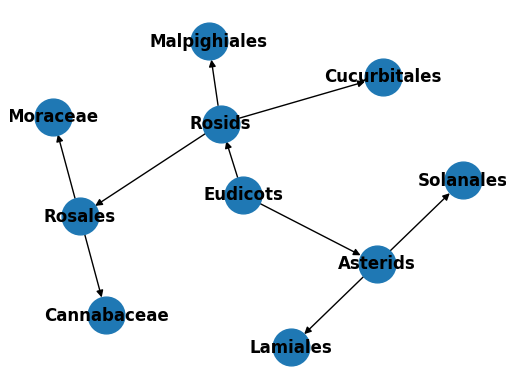

In [10]:
fig, ax = plt.subplots()
tree_constructor.visualize_genetic_relationships(df, ordering_list, ax, coloring)
plt.show(fig)